<a href="https://colab.research.google.com/github/NANA0904/pagedown/blob/main/SMOTE_TOMEK__2_of_Hybrid__Class_imbalance_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)
import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False

# **Methodological Flow Chart**

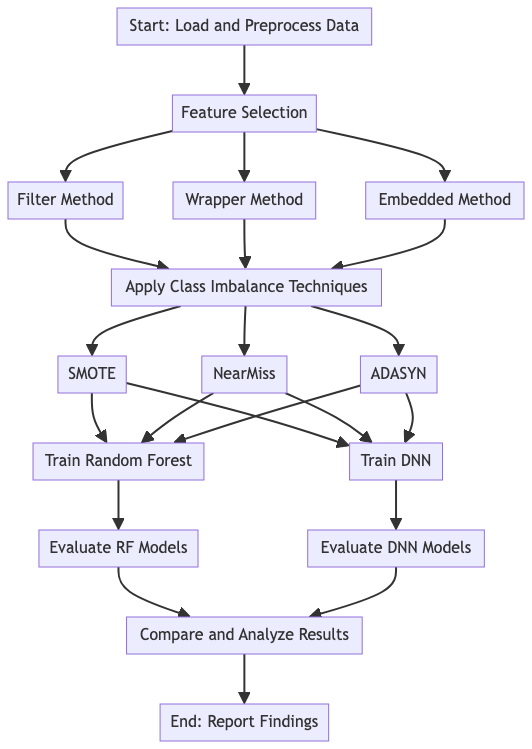

# **Data Loading and Preprocessing**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Masters Thesis/Datasets /Indicators of Heart Disease/2022/heart_2022.csv')


In [ ]:
data = data.drop(['State', 'HeightInMeters', 'WeightInKilograms'], axis=1)

In [ ]:
print(f'Number of records before removing duplicates: {data.shape[0]}')

# Number of duplicated records
duplicates = data.duplicated().sum()
print(f'Number of duplicated records: {duplicates}')



Number of records before removing duplicates: 246022
Number of duplicated records: 43


In [ ]:
# Remove duplicates if any
if duplicates > 0:
    data.drop_duplicates(inplace=True)
    print(f'Number of records after removing duplicates: {data.shape[0]}')
else:
    print('No duplicate records found.')

Number of records after removing duplicates: 245979


In [ ]:
print(data)

           Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0       Female     Very good                   4                 0   
1         Male     Very good                   0                 0   
2         Male     Very good                   0                 0   
3       Female          Fair                   5                 0   
4       Female          Good                   3                15   
...        ...           ...                 ...               ...   
246017    Male     Very good                   0                 0   
246018  Female          Fair                   0                 7   
246019    Male          Good                   0                15   
246020  Female     Excellent                   2                 2   
246021    Male     Very good                   0                 0   

                                          LastCheckupTime PhysicalActivities  \
0       Within past year (anytime less than 12 months ...                Yes   

Unique Age Categories and Counts:
AgeCategory
Age 65 to 69       28546
Age 60 to 64       26714
Age 70 to 74       25731
Age 55 to 59       22221
Age 50 to 54       19908
Age 75 to 79       18131
Age 80 or older    17816
Age 40 to 44       16972
Age 45 to 49       16750
Age 35 to 39       15613
Age 30 to 34       13346
Age 18 to 24       13122
Age 25 to 29       11109
Name: count, dtype: int64


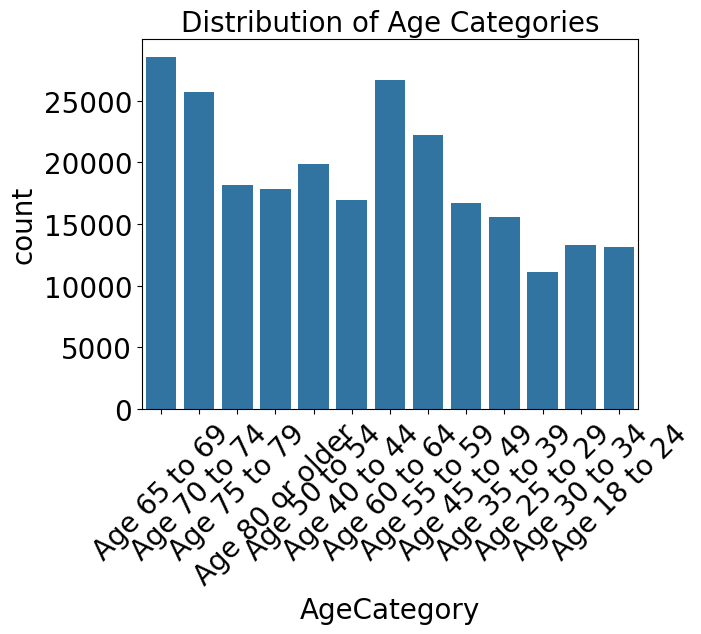

In [ ]:
# Print the unique age categories and their counts
print("Unique Age Categories and Counts:")
print(data['AgeCategory'].value_counts())

# Visualize the distribution of age categories
sns.countplot(x='AgeCategory', data=data)
plt.xticks(rotation=45)
plt.title('Distribution of Age Categories')
plt.show()

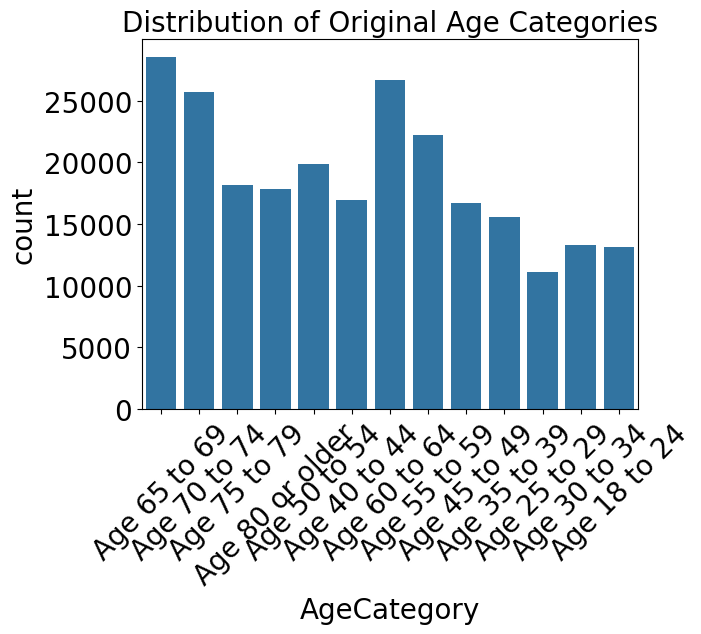

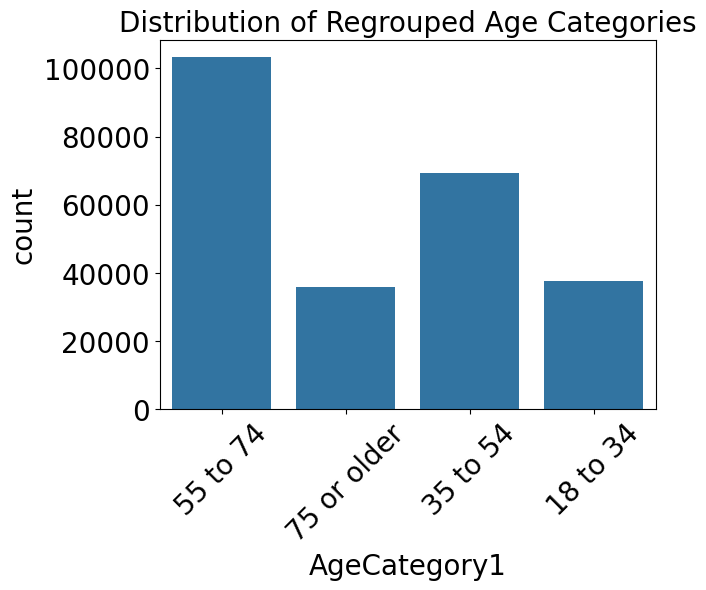

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to map each age category to the new group
def map_age_category(age):
    if age in ['Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34']:
        return '18 to 34'
    elif age in ['Age 35 to 39', 'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54']:
        return '35 to 54'
    elif age in ['Age 55 to 59', 'Age 60 to 64', 'Age 65 to 69', 'Age 70 to 74']:
        return '55 to 74'
    elif age in ['Age 75 to 79', 'Age 80 or older']:
        return '75 or older'

# Applying the mapping function to create a new column 'AgeCategory1'
data['AgeCategory1'] = data['AgeCategory'].apply(map_age_category)

# Visualize the distribution of original age categories
sns.countplot(x='AgeCategory', data=data)
plt.xticks(rotation=45)
plt.title('Distribution of Original Age Categories')
plt.show()

# Visualize the distribution of new age categories
sns.countplot(x='AgeCategory1', data=data)
plt.xticks(rotation=45)
plt.title('Distribution of Regrouped Age Categories')
plt.show()


In [ ]:
data = data.drop(['AgeCategory'], axis=1)

In [ ]:
data

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,...,RaceEthnicityCategory,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,AgeCategory1
0,Female,Very good,4,0,Within past year (anytime less than 12 months ...,Yes,9,None of them,No,No,...,"White only, Non-Hispanic",27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No,55 to 74
1,Male,Very good,0,0,Within past year (anytime less than 12 months ...,Yes,6,None of them,No,No,...,"White only, Non-Hispanic",30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,55 to 74
2,Male,Very good,0,0,Within past year (anytime less than 12 months ...,No,8,"6 or more, but not all",No,No,...,"White only, Non-Hispanic",31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,75 or older
3,Female,Fair,5,0,Within past year (anytime less than 12 months ...,Yes,9,None of them,No,No,...,"White only, Non-Hispanic",31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,75 or older
4,Female,Good,3,15,Within past year (anytime less than 12 months ...,Yes,5,1 to 5,No,No,...,"White only, Non-Hispanic",33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,75 or older
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Male,Very good,0,0,Within past 2 years (1 year but less than 2 ye...,Yes,6,None of them,No,No,...,"White only, Non-Hispanic",32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No,55 to 74
246018,Female,Fair,0,7,Within past year (anytime less than 12 months ...,Yes,7,None of them,No,No,...,"Black only, Non-Hispanic",24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,18 to 34
246019,Male,Good,0,15,Within past year (anytime less than 12 months ...,Yes,7,1 to 5,No,No,...,"Multiracial, Non-Hispanic",29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes,55 to 74
246020,Female,Excellent,2,2,Within past year (anytime less than 12 months ...,Yes,7,None of them,No,No,...,"Black only, Non-Hispanic",28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No,35 to 54


In [ ]:
numeric_features = data.select_dtypes(include=[np.number]).columns

# Generate descriptive statistics, and apply a style
styled_description = data.describe().iloc[1:][list(numeric_features)].T \
                      .style \
                      .background_gradient(cmap='Greens') \
                      .format("{:.2f}")  # Formats the numbers to two decimal places

# Display the styled DataFrame
styled_description

,mean,std,min,25%,50%,75%,max
PhysicalHealthDays,4.12,8.41,0.00,0.00,0.00,3.00,30.00
MentalHealthDays,4.17,8.10,0.00,0.00,0.00,4.00,30.00
SleepHours,7.02,1.44,1.00,6.00,7.00,8.00,24.00
BMI,28.67,6.51,12.02,24.27,27.46,31.89,97.65


In [ ]:
# Preliminary data analysis
print(data.head())
print(data.describe())
print(data.isnull().sum())

      Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Female     Very good                   4                 0   
1    Male     Very good                   0                 0   
2    Male     Very good                   0                 0   
3  Female          Fair                   5                 0   
4  Female          Good                   3                15   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                Yes   
1  Within past year (anytime less than 12 months ...                Yes   
2  Within past year (anytime less than 12 months ...                 No   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours            RemovedTeeth HadHeartAttack HadAngina  ...  \
0           9            None of them             No        No  ...   
1           6   

In [ ]:
print(data)

In [ ]:
categorical_features = data.select_dtypes(include=['object', 'category']).columns

# Now you have the categorical columns in categorical_features
print(categorical_features)


Index(['Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities',
       'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing',
       'BlindOrVisionDifficulty', 'DifficultyConcentrating',
       'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
       'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos', 'AgeCategory1'],
      dtype='object')


In [ ]:
import numpy as np

# Selecting numerical columns
numeric_features = data.select_dtypes(include=[np.number]).columns

# Now you have the numerical columns in numeric_features
print(numeric_features)


Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'BMI'], dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# List of categorical columns
cat_cols = ['Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities',
       'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing',
       'BlindOrVisionDifficulty', 'DifficultyConcentrating',
       'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
       'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos', 'AgeCategory1']

In [ ]:
le = LabelEncoder()
data[cat_cols] = data[cat_cols].apply(le.fit_transform)

# **Skip**

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# List of categorical columns
cat_cols = ['Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities',
            'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
            'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
            'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing',
            'BlindOrVisionDifficulty', 'DifficultyConcentrating',
            'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
            'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
            'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
            'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos',
            'AgeCategory1']

# One-hot encoding
for cat_col in cat_cols:
    if cat_col != 'HadHeartAttack':  # Exclude 'HadHeartAttack' for label encoding
        dummy_col = pd.get_dummies(data[cat_col], prefix=cat_col)
        data = pd.concat([data, dummy_col], axis=1)
        data.drop(cat_col, axis=1, inplace=True)

# Label encoding
le = LabelEncoder()
if data['HadHeartAttack'].dtype == 'O':
    data['HadHeartAttack'] = le.fit_transform(data['HadHeartAttack'])

data.head()


# **Continue**

In [ ]:
# Load the cleaned data from the CSV file
data = pd.read_csv('/content/drive/MyDrive/Masters Thesis/Datasets /Breast Cancer/cleaned_data.csv')
print("Cleaned data loaded successfully")

NameError: name 'pd' is not defined

In [ ]:
import random
random.seed(500)

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek

# Feature-target split
X = data.drop('HadHeartAttack', axis=1)  # Drop the target column to create the feature set
y = data['HadHeartAttack']  # Target variable

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=500)

# Apply SMOTE-Tomek
smote_tomek = SMOTETomek(random_state=500)
X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(X_train, y_train)


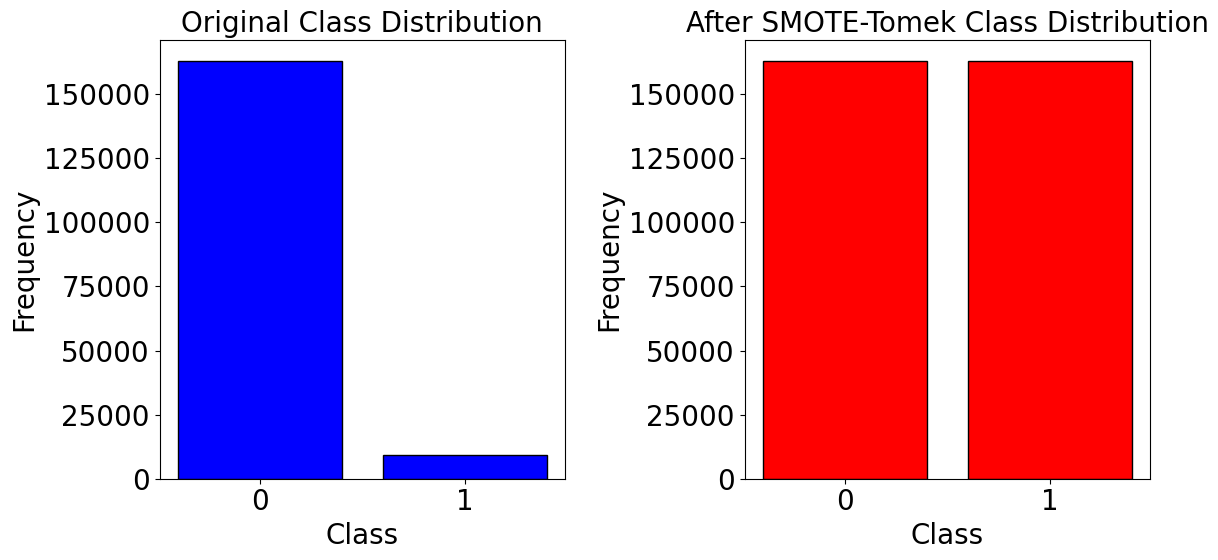

In [ ]:
import matplotlib.pyplot as plt

# Function to plot histograms before and after SMOTE-Tomek
def plot_histograms(y_train, y_train_resampled, title_before='Original', title_after='After Resampling'):
    plt.figure(figsize=(12, 6))

    # Histogram for the original class distribution
    plt.subplot(1, 2, 1)
    plt.hist(y_train, bins=np.arange(min(y_train), max(y_train) + 2) - 0.5, ec='black', color='blue', rwidth=0.8)
    plt.title(f'{title_before} Class Distribution')
    plt.xticks(np.unique(y_train))
    plt.xlabel('Class')
    plt.ylabel('Frequency')

    # Histogram for the class distribution after resampling (SMOTE-Tomek)
    plt.subplot(1, 2, 2)
    plt.hist(y_train_resampled, bins=np.arange(min(y_train_resampled), max(y_train_resampled) + 2) - 0.5, ec='black', color='red', rwidth=0.8)
    plt.title(f'{title_after} Class Distribution')
    plt.xticks(np.unique(y_train_resampled))
    plt.xlabel('Class')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Call the function to visualize before and after SMOTE-Tomek
plot_histograms(y_train, y_train_smote_tomek, title_before='Original', title_after='After SMOTE-Tomek')


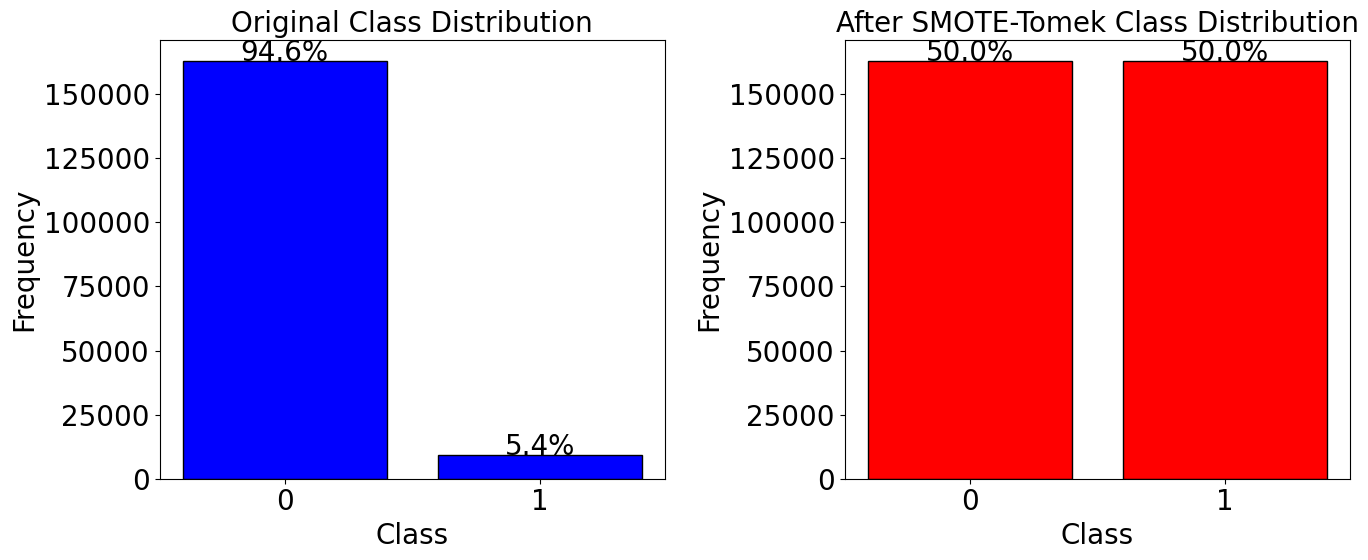

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot histograms with percentages before and after SMOTE-Tomek
def plot_histograms_with_percentages(y_train, y_train_resampled, title_before='Original', title_after='After SMOTE-Tomek'):
    plt.figure(figsize=(14, 6))

    # Histogram for the original class distribution
    plt.subplot(1, 2, 1)
    counts, bins, patches = plt.hist(y_train, bins=np.arange(min(y_train), max(y_train) + 2) - 0.5, ec='black', color='blue', rwidth=0.8)
    plt.title(f'{title_before} Class Distribution')
    plt.xticks(np.unique(y_train))
    plt.xlabel('Class')
    plt.ylabel('Frequency')

    # Adding percentages above bars for the original histogram
    total = len(y_train)
    for count, patch in zip(counts, patches):
        height = patch.get_height()
        plt.text(patch.get_x() + patch.get_width() / 2, height + 0.1, f'{(count / total) * 100:.1f}%', ha='center')

    # Histogram for the class distribution after SMOTE-Tomek
    plt.subplot(1, 2, 2)
    counts, bins, patches = plt.hist(y_train_resampled, bins=np.arange(min(y_train_resampled), max(y_train_resampled) + 2) - 0.5, ec='black', color='red', rwidth=0.8)
    plt.title(f'{title_after} Class Distribution')
    plt.xticks(np.unique(y_train_resampled))
    plt.xlabel('Class')
    plt.ylabel('Frequency')

    # Adding percentages above bars for the resampled histogram
    total_resampled = len(y_train_resampled)
    for count, patch in zip(counts, patches):
        height = patch.get_height()
        plt.text(patch.get_x() + patch.get_width() / 2, height + 0.1, f'{(count / total_resampled) * 100:.1f}%', ha='center')

    plt.tight_layout()
    plt.show()

# Example usage with SMOTE-Tomek labels
plot_histograms_with_percentages(y_train, y_train_smote_tomek, title_before='Original', title_after='After SMOTE-Tomek')


In [ ]:
# After applying SMOTE-Tomek
X_train_smote_tomek_shape = X_train_smote_tomek.shape
y_train_smote_tomek_shape = y_train_smote_tomek.shape

print("Shape of X_train_smote_tomek:", X_train_smote_tomek_shape)
print("Shape of y_train_smote_tomek:", y_train_smote_tomek_shape)


Shape of X_train_smote_tomek: (325668, 36)
Shape of y_train_smote_tomek: (325668,)


In [ ]:
# Print the class distribution after applying SMOTE-Tomek
print("Class distribution after SMOTE-Tomek:")
print(y_train_smote_tomek.value_counts())


Class distribution after SMOTE-Tomek:
HadHeartAttack
0    162834
1    162834
Name: count, dtype: int64


In [ ]:
# Isolate samples based on the target variable after SMOTE-Tomek
had_heart_attack = X_train_smote_tomek[y_train_smote_tomek == 1]
no_heart_attack = X_train_smote_tomek[y_train_smote_tomek == 0]



# Hybrid

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV


In [ ]:
# Filter Method: SelectKBest with Chi-Squared

k = 10  # For example, selecting top 10 features
chi2_selector = SelectKBest(chi2, k=k)
X_train_kbest = chi2_selector.fit_transform(X_train_smote, y_train_smote)

# Get the boolean mask indicating which features are selected
chi2_support = chi2_selector.get_support()

# Get the selected feature names
chi2_feature_names = X_train.columns[chi2_support]
chi2_feature_names


In [ ]:
chi2_scores = chi2_selector.scores_[chi2_support]
chi2_pvalues = chi2_selector.pvalues_[chi2_support]

selected_features_info = pd.DataFrame({
    'Feature Name': chi2_feature_names,
    'Chi2 Score': chi2_scores,
    'P-value': chi2_pvalues
}).sort_values(by='Chi2 Score', ascending=False).reset_index(drop=True)

print(selected_features_info)


In [ ]:
# Wrapper Method: RFE with RandomForest

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
# Apply RFE with a RandomForest classifier to select features
rf_estimator = RandomForestClassifier(n_estimators=100, random_state=500)
rfe_selector = RFE(estimator=rf_estimator, n_features_to_select=5)  # Adjusting to select top 5 features

# Use the feature names from the Chi-Squared selection to filter the DataFrame before RFE
X_train_rfe = rfe_selector.fit_transform(X_train_smote[chi2_feature_names], y_train_smote)

# Get the boolean mask of the selected features from RFE
rfe_support = rfe_selector.get_support()

# Translate RFE support mask back to original feature names selected by Chi-Squared
rfe_feature_names = chi2_feature_names[rfe_support]
rfe_feature_names


In [ ]:
# Extract the estimator from RFE (which is the fitted RandomForestClassifier)
fitted_rf_estimator = rfe_selector.estimator_

# Get the feature importances from the RandomForestClassifier
feature_importances = fitted_rf_estimator.feature_importances_

# Create a DataFrame for displaying the feature names and their corresponding importances
import pandas as pd

df_feature_importances = pd.DataFrame({
    'Feature Name': rfe_feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(df_feature_importances)


In [ ]:
# Embedded Method: LASSO for Feature Selection
from sklearn.linear_model import LassoCV

# Fit LASSO using the DataFrame filtered to the features selected by RFE
lasso = LassoCV(cv=5, random_state=500).fit(X_train_smote[rfe_feature_names], y_train_smote)

# lasso.coef_ will directly correspond to the features in 'rfe_feature_names'
lasso_support = lasso.coef_ != 0

# Filter 'rfe_feature_names' by 'lasso_support' to get the final selected feature names
lasso_feature_names = [name for (name, selected) in zip(rfe_feature_names, lasso_support) if selected]
lasso_feature_names

In [ ]:

# Extract non-zero coefficients and corresponding feature names
lasso_coefficients = lasso.coef_[lasso_support]
lasso_selected_features = [name for (name, selected) in zip(rfe_feature_names, lasso_support) if selected]

# Create a DataFrame for displaying the feature names and their corresponding LASSO coefficients
import pandas as pd

df_lasso_features = pd.DataFrame({
    'Feature Name': lasso_selected_features,
    'Coefficient': lasso_coefficients
}).sort_values(by='Coefficient', ascending=False).reset_index(drop=True)

print(df_lasso_features)


In [ ]:
# Filter the test set to include only the features selected by LASSO
X_test_selected = X_test[lasso_feature_names]
X_test_selected

In [ ]:
#RF Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, roc_auc_score

# Training the RF model on selected features
rf_model = RandomForestClassifier(n_estimators=200, random_state=500)
rf_model.fit(X_train_smote[lasso_feature_names], y_train_smote)

# Predicting on the test set
y_pred_rf = rf_model.predict(X_test_selected)

# Evaluation Metrics for RF
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest F1 Score:", f1_score(y_test, y_pred_rf))
print("Random Forest ROC AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_test_selected)[:, 1]))


In [ ]:
y_train_smot

# **Hybrid Method**

**Hybrid Method 1: Chi-Squared Test (Filter) + RFE (Wrapper) + LASSO (Embedded)**

In [ ]:
# Preliminary imports and setup
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV
from sklearn.metrics import classification_report, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek

# Feature-target split
X = data.drop('HadHeartAttack', axis=1)
y = data['HadHeartAttack']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=500)

# Apply SMOTE-Tomek
smote_tomek = SMOTETomek(random_state=500)
X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(X_train, y_train)

# Step 1: Apply Filter Method (Chi-Squared)
chi2_selector = SelectKBest(chi2, k=10)
X_train_chi2 = chi2_selector.fit_transform(X_train_smote_tomek, y_train_smote_tomek)
selected_features_chi2 = X_train.columns[chi2_selector.get_support()]

selected_feature_names_chi2 = selected_features_chi2
chi2_pvalues = chi2_selector.pvalues_
selected_pvalues_chi2 = chi2_pvalues[chi2_selector.get_support()]

# Create a DataFrame to display feature names and their corresponding p-values
df_selected_features_chi2 = pd.DataFrame({
    'Feature Name': selected_feature_names_chi2,
    'P-value': selected_pvalues_chi2
})
print("Selected features from Chi-Squared:\n", df_selected_features_chi2)

# Step 2: Apply Wrapper Method (RFE)
rfe_selector = RFE(RandomForestClassifier(n_estimators=100, random_state=500), n_features_to_select=5)
X_train_rfe = rfe_selector.fit_transform(X_train_smote_tomek[selected_features_chi2], y_train_smote_tomek)
selected_features_rfe = selected_features_chi2[rfe_selector.get_support()]

df_selected_features_rfe_corrected = pd.DataFrame({
    'Feature Name': selected_features_rfe,
    'RFE Ranking': [1 for _ in range(len(selected_features_rfe))]
})
print("Selected features via RFE:\n", df_selected_features_rfe_corrected)

# Step 3: Apply Embedded Method (Lasso)
lasso = LassoCV(cv=5, random_state=123)
lasso.fit(X_train_smote_tomek[selected_features_rfe], y_train_smote_tomek)
lasso_support = lasso.coef_ != 0
selected_features_lasso = selected_features_rfe[lasso_support]

# Extracting coefficients for the selected features
lasso_coefficients = lasso.coef_[lasso_support]

# Creating a DataFrame to display selected feature names and their coefficients
df_lasso_features = pd.DataFrame({
    'Feature Name': selected_features_lasso,
    'Coefficient': lasso_coefficients
})
df_lasso_features = df_lasso_features.reindex(df_lasso_features.Coefficient.abs().sort_values(ascending=False).index)
print("Selected features via Lasso:\n", df_lasso_features)

# Prepare the final training and test sets
X_train_final = X_train_smote_tomek[selected_features_lasso]
X_test_final = X_test[selected_features_lasso]

# Step 4: Train and Evaluate RF Model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=500)
rf_classifier.fit(X_train_final, y_train_smote_tomek)
y_pred_rf = rf_classifier.predict(X_test_final)
rf_f1_score = f1_score(y_test, y_pred_rf, average='weighted')
rf_roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test_final)[:, 1])

# Print RF metrics
print(f'RF Model F1 Score: {rf_f1_score:.4f}')
print(f'RF Model ROC AUC: {rf_roc_auc:.4f}')

# Train and Evaluate DNN Model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)
y_train_categorical = to_categorical(y_train_smote_tomek)
y_test_categorical = to_categorical(y_test)

dnn_model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_train_categorical.shape[1], activation='softmax')
])

dnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
dnn_model.fit(X_train_scaled, y_train_categorical, epochs=60, batch_size=32, verbose=1)

y_pred_dnn = dnn_model.predict(X_test_scaled)
y_pred_dnn_classes = np.argmax(y_pred_dnn, axis=1)
dnn_f1_score = f1_score(y_test, y_pred_dnn_classes, average='weighted')
dnn_roc_auc = roc_auc_score(y_test_categorical[:, 1], y_pred_dnn[:, 1])

# Corrected Print Statements for Metrics
print(f'DNN Model F1 Score: {dnn_f1_score:.4f}')
print(f'DNN Model ROC AUC: {dnn_roc_auc:.4f}')

# Evaluation Metrics for RF Model
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest ROC AUC Score:", roc_auc_score(y_test, rf_classifier.predict_proba(X_test_final)[:, 1]))

# Correctly process DNN predictions for binary classification
if y_train_categorical.shape[1] == 2:
    y_pred_dnn_binary = (y_pred_dnn[:, 1] > 0.5).astype(int)
else:
    y_pred_dnn_binary = np.argmax(y_pred_dnn, axis=1)

# Evaluation Metrics for DNN Model
print("\nDeep Neural Network Classification Report:\n", classification_report(y_test, y_pred_dnn_binary))
print("Deep Neural Network F1 Score:", f1_score(y_test, y_pred_dnn_binary, average='weighted'))
dnn_roc_auc_score = roc_auc_score(y_test, y_pred_dnn[:, 1]) if y_train_categorical.shape[1] == 2 else "N/A for multiclass"
print("Deep Neural Network ROC AUC Score:", dnn_roc_auc_score)


Selected features from Chi-Squared:
          Feature Name  P-value
0  PhysicalHealthDays      0.0
1    MentalHealthDays      0.0
2  PhysicalActivities      0.0
3        RemovedTeeth      0.0
4           HadAngina      0.0
5         HadDiabetes      0.0
6     ECigaretteUsage      0.0
7     AlcoholDrinkers      0.0
8          HIVTesting      0.0
9        AgeCategory1      0.0
Selected features via RFE:
          Feature Name  RFE Ranking
0  PhysicalHealthDays            1
1        RemovedTeeth            1
2           HadAngina            1
3     AlcoholDrinkers            1
4        AgeCategory1            1
Selected features via Lasso:
          Feature Name  Coefficient
2           HadAngina     0.349553
3     AlcoholDrinkers    -0.228382
4        AgeCategory1     0.100604
1        RemovedTeeth    -0.049168
0  PhysicalHealthDays     0.005301
RF Model F1 Score: 0.8218
RF Model ROC AUC: 0.8355
Epoch 1/60
10178/10178 [==============================] - 13s 1ms/step - loss: 0.5003 - accur

# **Continue from here**

**Hybrid Method 2: Information Gain (Filter) + Logistic Regression (Wrapper) + Ridge Regression (L2 Regularization) (Embedded)**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_classif, SelectKBest, RFE
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Assuming X_train_smote, y_train_smote, X_test, and y_test are properly defined and loaded

# Apply Information Gain as the filter method
info_gain_selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_train_info_gain = info_gain_selector.fit_transform(X_train_smote_tomek, y_train_smote_tomek)
selected_features_info_gain = X_train_smote_tomek.columns[info_gain_selector.get_support()]

# Capture Information Gain scores for selected features
info_gain_scores = info_gain_selector.scores_[info_gain_selector.get_support()]

# Creating a DataFrame for easier visualization of selected features and their information gain scores
selected_features_with_scores = pd.DataFrame({
    'Feature Name': selected_features_info_gain,
    'Information Gain': info_gain_scores
}).sort_values(by='Information Gain', ascending=False).reset_index(drop=True)

print(selected_features_with_scores)

# Apply Logistic Regression as the wrapper method
logreg_selector = RFE(LogisticRegression(solver='liblinear', random_state=500), n_features_to_select=5)
X_train_logreg = logreg_selector.fit_transform(X_train_smote_tomek[selected_features_info_gain], y_train_smote_tomek)
selected_features_logreg = selected_features_info_gain[logreg_selector.get_support()]

# Creating a DataFrame to display selected features and their rankings
selected_features_with_rankings = pd.DataFrame({
    'Feature Name': selected_features_logreg,
    'RFE Ranking': logreg_selector.ranking_[logreg_selector.get_support()]
})

print(selected_features_with_rankings)

# Apply Ridge Regression as the embedded method
ridge = RidgeClassifier(alpha=1.0)
ridge.fit(X_train_smote_tomek[selected_features_logreg], y_train_smote_tomek)

# Extracting the coefficients and their importance
ridge_coefficients = np.abs(ridge.coef_[0])
ridge_support = ridge_coefficients > np.mean(ridge_coefficients)
selected_features_ridge = selected_features_logreg[ridge_support]

# Create and print the DataFrame of selected features and their coefficients
df_selected_features = pd.DataFrame({
    'Feature Name': selected_features_ridge,
    'Coefficient': ridge_coefficients[ridge_support]
}).sort_values(by='Coefficient', ascending=False).reset_index(drop=True)

print(df_selected_features)



         Feature Name  Information Gain
0                 BMI          0.517609
1       GeneralHealth          0.099429
2        RemovedTeeth          0.095423
3        SmokerStatus          0.088512
4           HadAngina          0.085675
5  PhysicalActivities          0.080660
6     AlcoholDrinkers          0.077652
7        AgeCategory1          0.077115
8           ChestScan          0.061152
9     LastCheckupTime          0.054652
         Feature Name  RFE Ranking
0  PhysicalActivities            1
1           HadAngina            1
2        SmokerStatus            1
3     AlcoholDrinkers            1
4        AgeCategory1            1
      Feature Name  Coefficient
0        HadAngina     0.708063
1  AlcoholDrinkers     0.439849


In [ ]:
# Prepare the final train and test sets
X_train_final = X_train_smote_tomek[selected_features_ridge]
X_test_final = X_test[selected_features_ridge]

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=500)
rf_model.fit(X_train_final, y_train_smote_tomek)
y_pred_rf = rf_model.predict(X_test_final)
rf_f1_score = f1_score(y_test, y_pred_rf, average='weighted')
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test_final)[:, 1])

# Train Deep Neural Network Model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)
y_train_categorical = to_categorical(y_train_smote_tomek)
y_test_categorical = to_categorical(y_test)

dnn_model = Sequential([
    Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

dnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
dnn_model.fit(X_train_scaled, y_train_categorical, epochs=100, batch_size=32, verbose=0)

y_pred_dnn_prob = dnn_model.predict(X_test_scaled)
y_pred_dnn_classes = np.argmax(y_pred_dnn_prob, axis=1)
dnn_f1_score = f1_score(y_test, y_pred_dnn_classes, average='weighted')
dnn_roc_auc = roc_auc_score(y_test_categorical[:, 1], y_pred_dnn_prob[:, 1])

# Display Metrics
print(f'RF Model F1 Score: {rf_f1_score:.4f}')
print(f'RF Model ROC AUC: {rf_roc_auc:.4f}')
print(f'DNN Model F1 Score: {dnn_f1_score:.4f}')
print(f'DNN Model ROC AUC: {dnn_roc_auc:.4f}')

# Classification Reports
print("RF Model Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("DNN Model Classification Report:")
print(classification_report(y_test, y_pred_dnn_classes))


2307/2307 [==============================] - 6s 3ms/step
RF Model F1 Score: 0.6690
RF Model ROC AUC: 0.7724
DNN Model F1 Score: 0.6690
DNN Model ROC AUC: 0.7724
RF Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.54      0.70     69766
           1       0.09      0.80      0.16      4028

    accuracy                           0.56     73794
   macro avg       0.54      0.67      0.43     73794
weighted avg       0.93      0.56      0.67     73794

DNN Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.54      0.70     69766
           1       0.09      0.80      0.16      4028

    accuracy                           0.56     73794
   macro avg       0.54      0.67      0.43     73794
weighted avg       0.93      0.56      0.67     73794



**Hybrid Method 3: ANOVA F-value (Filter) + Random Forest (Wrapper) + Decision Tree-based Feature Importance (Embedded)**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# Set random seed
np.random.seed(3030)

# Assuming X_train_smote, y_train_smote, X_test, and y_test are predefined

# Step 1: Apply ANOVA F-value Filter Method
anova_selector = SelectKBest(f_classif, k=10)
X_train_anova = anova_selector.fit_transform(X_train_smote_tomek, y_train_smote_tomek)
selected_features_anova = X_train.columns[anova_selector.get_support()]

# Creating DataFrame for ANOVA F-values
anova_scores = anova_selector.scores_[anova_selector.get_support()]
df_selected_features_anova = pd.DataFrame({
    'Feature Name': selected_features_anova,
    'F-value': anova_scores
}).sort_values(by='F-value', ascending=False).reset_index(drop=True)
print("ANOVA F-value selected features:")
print(df_selected_features_anova)

# Step 2: Apply Random Forest (Wrapper) via RFE
rf_wrapper_selector = RFE(RandomForestClassifier(n_estimators=100, random_state=500), n_features_to_select=5)
X_train_rf = rf_wrapper_selector.fit_transform(X_train_smote_tomek[selected_features_anova], y_train_smote_tomek)
selected_features_rf = selected_features_anova[rf_wrapper_selector.get_support()]

# Creating DataFrame for RFE Rankings
rf_rankings = rf_wrapper_selector.ranking_
df_selected_features_rf = pd.DataFrame({
    'Feature Name': selected_features_anova,
    'RFE Ranking': rf_rankings
}).sort_values(by='RFE Ranking', ascending=True).reset_index(drop=True)
print("RFE selected features with rankings:")
print(df_selected_features_rf)

# Step 3: Apply Decision Tree Classifier (Embedded Method)
dt_classifier = DecisionTreeClassifier(random_state=2021)
dt_classifier.fit(X_train_smote_tomek[selected_features_rf], y_train_smote_tomek)

# Get feature importances from the Decision Tree
dt_importances = dt_classifier.feature_importances_
selected_features_dt = selected_features_rf
df_selected_features_dt = pd.DataFrame({
    'Feature Name': selected_features_dt,
    'Importance': dt_importances
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)
print("Decision Tree selected features based on importance:")
print(df_selected_features_dt)

# Preparing the final training and test sets
X_train_final = X_train_smote_tomek[selected_features_dt]
X_test_final = X_test[selected_features_dt]

# Train and Evaluate Random Forest Model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=500)
rf_classifier.fit(X_train_final, y_train_smote_tomek)
y_pred_rf = rf_classifier.predict(X_test_final)
rf_f1_score = f1_score(y_test, y_pred_rf, average='weighted')
rf_roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test_final)[:, 1])

# Print Random Forest metrics
print(f'Random Forest Model F1 Score: {rf_f1_score}')
print(f'Random Forest Model ROC AUC: {rf_roc_auc}')

# Train and Evaluate Deep Neural Network Model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)
y_train_categorical = to_categorical(y_train_smote_tomek)
y_test_categorical = to_categorical(y_test)

dnn_model = Sequential([
    Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_train_categorical.shape[1], activation='softmax')
])

dnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
dnn_history = dnn_model.fit(X_train_scaled, y_train_categorical, epochs=10, batch_size=32, verbose=0)

y_pred_dnn_prob = dnn_model.predict(X_test_scaled)
y_pred_dnn_classes = np.argmax(y_pred_dnn_prob, axis=1)
dnn_f1_score = f1_score(y_test, y_pred_dnn_classes, average='weighted')
dnn_roc_auc = roc_auc_score(y_test_categorical[:, 1], y_pred_dnn_prob[:, 1])

# Print DNN metrics
print(f'DNN Model F1 Score: {dnn_f1_score}')
print(f'DNN Model ROC AUC: {dnn_roc_auc}')

# Classification Reports
print("\nRandom Forest Model Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nDNN Model Classification Report:")
print(classification_report(y_test, y_pred_dnn_classes))


ANOVA F-value selected features:
         Feature Name       F-value
0           HadAngina  54326.781799
1     AlcoholDrinkers  41218.561917
2  PhysicalActivities  31936.269670
3        AgeCategory1  31242.982022
4        SmokerStatus  23549.502578
5        RemovedTeeth  22207.169314
6           ChestScan  20661.529535
7  PhysicalHealthDays  19470.998808
8          HIVTesting  18755.782745
9         HadDiabetes  12103.902187
RFE selected features with rankings:
         Feature Name  RFE Ranking
0        RemovedTeeth            1
1           HadAngina            1
2        SmokerStatus            1
3     AlcoholDrinkers            1
4        AgeCategory1            1
5  PhysicalHealthDays            2
6  PhysicalActivities            3
7          HIVTesting            4
8         HadDiabetes            5
9           ChestScan            6
Decision Tree selected features based on importance:
      Feature Name  Importance
0        HadAngina    0.370035
1     SmokerStatus    0.265449
2  

#**BNN**

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfpl = tfp.layers

def build_bnn_model(input_shape, output_units, hidden_units=[64, 32]):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=input_shape))

    # Add DenseVariational layers for Bayesian inference
    for units in hidden_units:
        model.add(tfpl.DenseReparameterization(
            units=units,
            activation='relu',
            kernel_prior_fn=tfpl.default_multivariate_normal_fn,
            kernel_posterior_fn=tfpl.default_mean_field_normal_fn(),
            kernel_divergence_fn=(lambda q, p, _: tfd.kl_divergence(q, p) / tf.cast(input_shape[0], tf.float32)),
            bias_prior_fn=tfpl.default_multivariate_normal_fn,
            bias_posterior_fn=tfpl.default_mean_field_normal_fn(),
            bias_divergence_fn=(lambda q, p, _: tfd.kl_divergence(q, p) / tf.cast(input_shape[0], tf.float32))
        ))

    # Output layer
    model.add(tfpl.DenseReparameterization(
        units=tfpl.OneHotCategorical.params_size(output_units),
        activation=None,
        kernel_prior_fn=tfpl.default_multivariate_normal_fn,
        kernel_posterior_fn=tfpl.default_mean_field_normal_fn(),
        kernel_divergence_fn=(lambda q, p, _: tfd.kl_divergence(q, p) / tf.cast(input_shape[0], tf.float32))
    ))

    # Convert the logits to a categorical distribution
    model.add(tfpl.OneHotCategorical(event_size=output_units, convert_to_tensor_fn=tfd.Distribution.sample))

    return model


In [ ]:
model = build_bnn_model(input_shape=(X_train.shape[1],), output_units=2)  # Example for binary classification

def negative_log_likelihood(y_true, y_pred):
    return -y_pred.log_prob(y_true)

model.compile(optimizer='adam', loss=negative_log_likelihood, metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=1)  # Adjust epochs, batch_size as necessary


Epoch 1/200
5381/5381 [==============================] - 31s 6ms/step - loss: 9878726.0000 - accuracy: 0.5012
Epoch 2/200
5381/5381 [==============================] - 25s 5ms/step - loss: 10123482.0000 - accuracy: 0.5018
Epoch 3/200
5381/5381 [==============================] - 14s 3ms/step - loss: 10381912.0000 - accuracy: 0.4989
Epoch 4/200
5381/5381 [==============================] - 14s 3ms/step - loss: 10645204.0000 - accuracy: 0.5014
Epoch 5/200
5381/5381 [==============================] - 14s 3ms/step - loss: 10917256.0000 - accuracy: 0.5003
Epoch 6/200
5381/5381 [==============================] - 14s 3ms/step - loss: 11164806.0000 - accuracy: 0.4999
Epoch 7/200
5381/5381 [==============================] - 15s 3ms/step - loss: 11445838.0000 - accuracy: 0.4997
Epoch 8/200
5381/5381 [==============================] - 15s 3ms/step - loss: 11741683.0000 - accuracy: 0.5004
Epoch 9/200
5381/5381 [==============================] - 15s 3ms/step - loss: 12009483.0000 - accuracy: 0.4991
Ep

In [ ]:
print(type(X_test))
print(X_test.shape)


<class 'pandas.core.frame.DataFrame'>
(73794, 36)


In [ ]:
import numpy as np

# If X_test is, for example, a pandas DataFrame:
X_test_np = X_test.values

# Or if it needs to be converted from some other format to a NumPy array:
X_test_np = np.array(X_test)


In [ ]:
y_pred_dist = model(X_test_np)  # Ensure X_test_np is in the correct format
y_pred_mean = y_pred_dist.mean()  # Use the mean of the distribution for point predictions


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Assuming binary classification and y_test is not one-hot encoded
accuracy = accuracy_score(y_test, np.argmax(y_pred_mean, axis=1))
roc_auc = roc_auc_score(y_test, y_pred_mean[:, 1])  # Probability of the positive class

print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")


Accuracy: 0.0672141366506762
ROC AUC: 0.4995306430225642


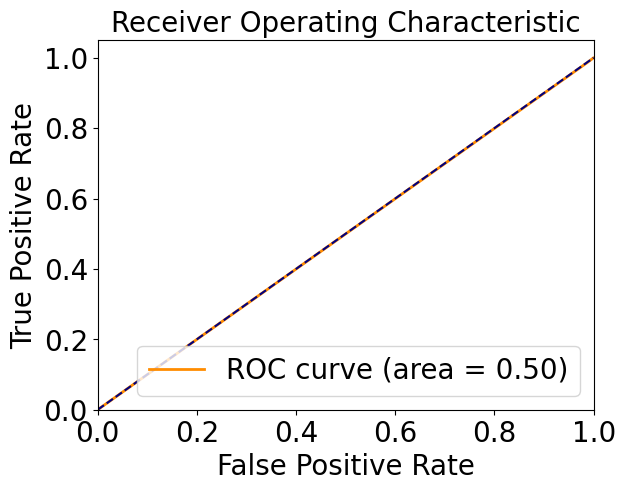

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_pred_mean[:, 1] gives the predicted probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_mean[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp

# Assuming 'model' is your compiled BNN model
for i, layer in enumerate(model.layers):
    if isinstance(layer, tfp.layers.DenseFlipout):
        # Access the kernel posterior's mean and standard deviation
        kernel_posterior_mean = layer.kernel_posterior.mean()
        kernel_posterior_stddev = layer.kernel_posterior.stddev()

        # Convert Tensors to numpy arrays for easy viewing
        kernel_posterior_mean_np = kernel_posterior_mean.numpy()
        kernel_posterior_stddev_np = kernel_posterior_stddev.numpy()

        # Printing the values
        print(f"Layer {i} - DenseFlipout")
        print("Kernel Posterior Mean:\n", kernel_posterior_mean_np)
        print("Kernel Posterior Stddev:\n", kernel_posterior_stddev_np)
        print("\n")  # Adds a new line for readability between layers


# ALT BNN

In [ ]:
import torch
import torch.nn as nn
import pyro
import pyro.distributions as dist
from pyro.nn import PyroModule, PyroSample

class BayesianNN(PyroModule):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = PyroModule[nn.Linear](input_size, hidden_size)
        self.fc1.weight = PyroSample(dist.Normal(0., 1.).expand([hidden_size, input_size]).to_event(2))
        self.fc1.bias = PyroSample(dist.Normal(0., 10.).expand([hidden_size]).to_event(1))
        self.fc2 = PyroModule[nn.Linear](hidden_size, output_size)
        self.fc2.weight = PyroSample(dist.Normal(0., 1.).expand([output_size, hidden_size]).to_event(2))
        self.fc2.bias = PyroSample(dist.Normal(0., 10.).expand([output_size]).to_event(1))

    def forward(self, x, y=None):
        x = torch.relu(self.fc1(x))
        mean = self.fc2(x)
        sigma = torch.ones(mean.size()) * 0.1  # Assume fixed noise
        with pyro.plate("data", x.shape[0]):
            obs = pyro.sample("obs", dist.Normal(mean, sigma), obs=y)
        return mean


In [ ]:
import torch

# Assuming X_train and y_train are pandas DataFrames or Series
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

# If y_train is a vector, ensure it has the correct shape
# For a regression problem
if len(y_train_tensor.shape) == 1:
    y_train_tensor = y_train_tensor.unsqueeze(1)  # Convert to a column vector if necessary


In [ ]:
from pyro.infer import SVI, Trace_ELBO
from pyro.optim import Adam

model = BayesianNN(input_size=4, hidden_size=10, output_size=1)
guide = pyro.infer.autoguide.AutoDiagonalNormal(model)
optimizer = Adam({"lr": 0.01})
svi = SVI(model, guide, optimizer, loss=Trace_ELBO())

num_iterations = 1000
for j in range(num_iterations):
    # Use the tensor versions of your data
    loss = svi.step(X_train_tensor, y_train_tensor)
    if j % 100 == 0:
        print(f"Epoch {j} : loss = {loss}")


RuntimeError: mat1 and mat2 shapes cannot be multiplied (172185x36 and 4x10)
  Trace Shapes:       
   Param Sites:       
  Sample Sites:       
fc1.weight dist | 10 4
          value | 10 4
  fc1.bias dist | 10  
          value | 10  
Trace Shapes:
 Param Sites:
Sample Sites: